<a href="https://colab.research.google.com/github/Jgabriel1800/loja-de-roupas-python-sql/blob/main/lojaderoupapy_sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text
import seaborn as sns

In [28]:
itens_pedidos=pd.read_csv('itens_pedidos.csv', sep=';')
nome_vendedor=pd.read_csv('nome_vendedor.csv', sep=';')
pedido=pd.read_csv('pedido.csv', sep=';')
produto=pd.read_csv('produto.csv', sep=';')

Criando nosso banco de dados local

In [29]:
engine=create_engine('sqlite:///:memory:')

In [30]:
produto.to_sql('produto',engine,index=False)

50

In [31]:
itens_pedidos.to_sql('itens_pedidos',engine,index=False)
nome_vendedor.to_sql('nome_vendedor',engine,index=False)
pedido.to_sql('pedido',engine,index=False)


100

inspecionando as tabelas

In [32]:
inspector=inspect(engine)
print(inspector.get_table_names())

['itens_pedidos', 'nome_vendedor', 'pedido', 'produto']


Entendendo as características dos produtos, analisando a condição dos produtos vendidos

In [33]:
query='SELECT CONDICAO FROM PRODUTO'

In [34]:
with engine.connect() as conexao:
  consulta= conexao.execute(text(query))
  dados= consulta.fetchall()

pd.DataFrame(dados,columns=consulta.keys())

,condicao
0,Usado
1,Usado
2,Recondicionado
3,Novo
4,Novo
5,Novo
6,Novo
7,Novo
8,Novo
9,Usado


In [35]:
def sql_df(query):
  with engine.connect() as conexao:
    consulta= conexao.execute(text(query))
    dados= consulta.fetchall()

  return pd.DataFrame(dados,columns=consulta.keys())

In [36]:
query='''SELECT CONDICAO, COUNT(*) AS 'Quantidade'
FROM PRODUTO
GROUP BY CONDICAO;'''
df_produtos=sql_df(query)

<ipython-input-44-91cc87fc5cf1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_produtos['condicao'], y=df_produtos['Quantidade'], palette='Blues')


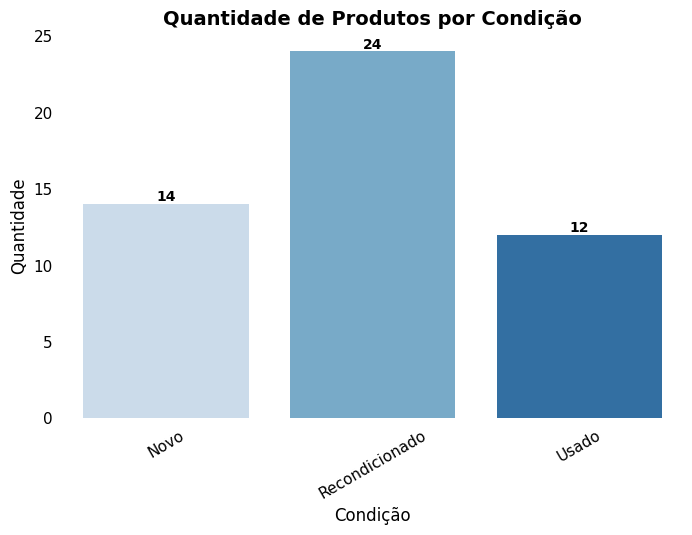

In [44]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=df_produtos['condicao'], y=df_produtos['Quantidade'], palette='Blues')

plt.title('Quantidade de Produtos por Condição', fontsize=14, fontweight='bold')
plt.xlabel('Condição', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)

plt.xticks(rotation=30, fontsize=11)
plt.yticks(fontsize=11)
ax.spines['top'].set_visible(False), ax.spines['right'].set_visible(False), ax.spines['left'].set_visible(False), ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False, left=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.show()

Rankeando os produtos que mais foram pedidos por quantidade e entender a necessidade de um estoque de produtos

In [45]:
sql_df('SELECT * FROM PRODUTO').head(3)

,condicao,marca,preco,produto,produto_id,sku,Total
0,Usado,Martins Freitas - EI,1770.96,Ad,66b49c62,187d2e,16
1,Usado,Lima,1679.14,Quas,ae0a6b23,a410a2,89
2,Recondicionado,Ferreira Ltda.,1612.40,Aperiam,159990a9,918afb,15


In [46]:
sql_df('SELECT * FROM ITENS_PEDIDOS').head(3)

,estado,frete,id_nf,pedido_id,produto_id,quantidade,valor_total,valor_unitario
0,Roraima,19.87,aad5207c,994261fe,61c13c48,4,632.54,479.30
1,Piauí,74.89,c33edc8a,f970fe3f,ada92985,5,3600.85,727.94
2,Bahia,11.63,c2b9f67c,f0f0acb2,8fdb1c97,4,1054.55,320.65


In [53]:
query='''SELECT ITENS_PEDIDOS.PRODUTO_ID,
PRODUTO.PRODUTO,
SUM(ITENS_PEDIDOS.QUANTIDADE) AS 'Quantidade'FROM ITENS_PEDIDOS, PRODUTO
WHERE ITENS_PEDIDOS.PRODUTO_ID = PRODUTO.PRODUTO_ID
GROUP BY PRODUTO.PRODUTO
ORDER BY Quantidade ASC'''

df_prod_quant=sql_df(query)
df_prod_quant

,produto_id,produto,Quantidade
0,84d6eb98,Optio,2
1,7bc997bc,Quisquam,3
2,d21826e7,Quidem,4
3,2ae1c30a,Voluptatem,4
4,cdff9c36,Voluptas,5
5,25516aaf,Adipisci,7
6,34c4bf26,Omnis,7
7,ea11ecd3,Voluptate,7
8,ada92985,Alias,8
9,07998ac3,Nulla,8


<ipython-input-56-0fe180d06bde>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_top10['Quantidade'], y=df_top10['produto'], palette='Blues_r')


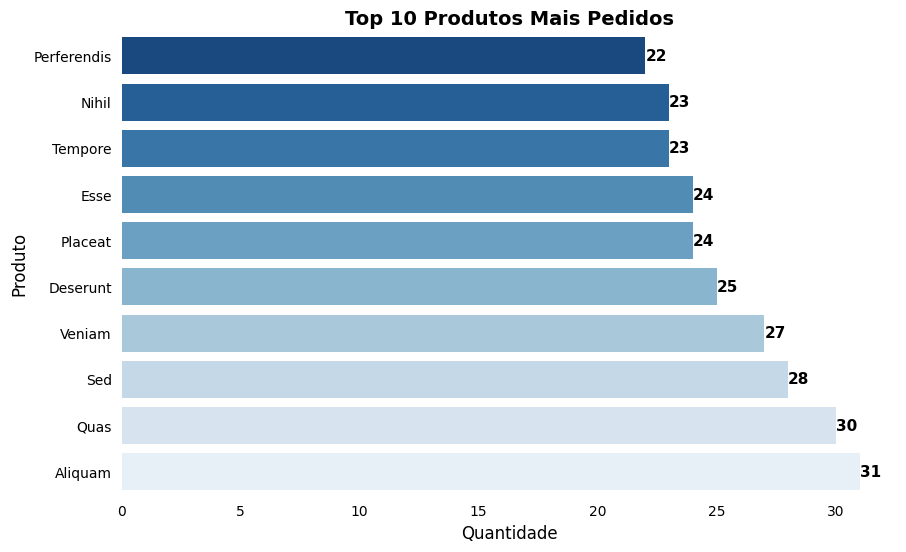

In [56]:
df_top10 = df_prod_quant.sort_values(by='Quantidade').tail(10)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=df_top10['Quantidade'], y=df_top10['produto'], palette='Blues_r')
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=11, fontweight='bold', color='black')
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Produto', fontsize=12)
plt.title('Top 10 Produtos Mais Pedidos', fontsize=14, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(left=False, bottom=False)

plt.show()


Lidando com filtro

In [57]:
sql_df('SELECT * FROM PEDIDO').head()

,data_compra,pedido_id,produto_id,total,vendedor_id
0,2021-01-23,994261fe,61c13c48,2,2d908ee8
1,2023-07-22,f970fe3f,ada92985,10,2d908ee8
2,2020-10-18,f0f0acb2,8fdb1c97,8,0aca65b3
3,2022-07-08,627664aa,199ef7d5,2,0aca65b3
4,2020-08-04,17b2fa37,7bc997bc,1,74ef72ca


In [58]:
sql_df('SELECT * FROM PEDIDO').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   data_compra  100 non-null    object
 1   pedido_id    100 non-null    object
 2   produto_id   100 non-null    object
 3   total        100 non-null    int64 
 4   vendedor_id  100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


Para analisarmos o desempenho do ano de 2024, precisamos analisar o desempenho dos anos anteriores

In [73]:
query='''SELECT NOME_VENDEDOR.NOME_VENDEDOR, AVG(PEDIDO.TOTAL) AS 'Valor médio por vendas'
FROM PEDIDO, NOME_VENDEDOR
WHERE strftime('%Y',DATA_COMPRA) = '2024' AND NOME_VENDEDOR.VENDEDOR_ID=PEDIDO.VENDEDOR_ID
GROUP BY NOME_VENDEDOR.NOME_VENDEDOR
ORDER BY AVG(PEDIDO.TOTAL) DESC;
 '''
sql_df(query)

,nome_vendedor,Valor médio por vendas
0,Sr. Davi Luiz Farias,10.000000
1,Marcos Vinicius Caldeira,8.000000
2,Igor da Luz,7.000000
3,Rodrigo da Cruz,3.666667
4,Davi Luiz Carvalho,3.000000
5,Davi Luiz Alves,3.000000
6,Srta. Bruna da Cunha,2.000000
7,Maria Fernanda Cunha,2.000000
8,Marcelo das Neves,2.000000
9,Elisa da Conceição,2.000000
